In [7]:
# !apt-get update
# !apt-get install -y libzbar0
# !pip install pyzbar

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,107 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,424 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,472 kB]
Get:13 http://archive.ubuntu.com/ubunt

In [6]:
# from google.colab import files
from IPython import display
import pyzbar.pyzbar as pyzbar

ImportError: Unable to find zbar shared library

In [9]:
# uploaded = files.upload()

Saving qrcode.70916523.png to qrcode.70916523.png


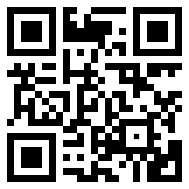

In [10]:
img = display.Image('qrcode.70916523.png')
img

Type :  QRCODE
Data :  b'https://qrs.ly/mrgbgfq'


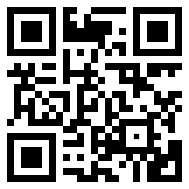

-1

In [11]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('qrcode.70916523.png')
decodedObjects = pyzbar.decode(img)

for obj in decodedObjects:
    print('Type : ', obj.type)
    print('Data : ', obj.data)

cv2_imshow(img)
cv2.waitKey(0)

<h1>with videos</h1>

In [ ]:
import numpy as np

In [ ]:
cap = cv2.VideoCapture(0)


def get_qr_data(input_frame):
    try:
        return pyzbar.decode(input_frame)
    except:
        return []


def draw_polygon(f_in, qro):
    if len(qro) == 0:
        return f_in
    else:
        for obj in qro:
            text = obj.data.decode('utf-8')
            pts = np.array([obj.polygon], np.int32)
            # print("Before Reshape::", pts.shape)
            pts = pts.reshape((4, 1, 2))
            # print("After Reshape::",pts.shape)
            cv2.polylines(f_in, [pts], True, (255, 100, 5), 2)
            cv2.putText(f_in, text, (50, 50), cv2.FONT_HERSHEY_PLAIN,1.5,(255,100,5),2)
        return f_in


while True:
    _, frame = cap.read()
    qr_obj = get_qr_data(frame)
    frame = draw_polygon(frame, qr_obj)
    cv2.imshow("DD", frame)
    # cv2.imshow("DD2", frame2)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()